# Theoretical Background

## Hypothesis Testing
______________________________________________________________________________________________________________________________________________

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on sample data. The goal is to assess whether there is enough statistical evidence in the sample data to support or reject a hypothesis about the population.

Null alternative Hypothesis is the basic assumption for the base state of the population/data set variables such as saying there is no  relationship amongst the variables. Alternative hypotheses suggest the opposite saying that there is a relationship amongst the population/data variables. In the context of testing for nonlinearity you would say that that the base case null hypothessis is that the population variable realtionship is nonlinear and the alternative hypotheis is that the relationship is linear.

## Nonlinear Process
______________________________________________________________________________________________________________________________________________

A nonlinear process maps inputs to outputs modeled by a relationship where a change in the input is not modeled proportionally where rates of change vary where as a linear process is one which the function which maps inputs to outputs is modeled by a relationship where a change in the input has a proportional change in the output. Other key indicators of nonlinear process is if its not addative and multiplicative ie f(x + y) ≠ f(x) + f(y)

## Testing for Nonlinearity
______________________________________________________________________________________________________________________________________________

Two options :BDS Test for Nonlinearity and White's Neural Network Test

###BDS Test for Nonlinearity
The BDS Test is a statistical method used to detect nonlinearity or dependence in time series data. It tests whether a given series is independently and identically distributed (i.i.d.), which is a key assumption in many models. By analyzing patterns in the reconstructed phase space of the time series, it can reveal hidden structures, chaos, or nonlinear dependencies that standard linear models fail to capture.

###White's Neural Network Test
The White's Neural Test puts a Linear Model or Affine Network to fit the data and then model the values which are then calualted into residuals using the orginal data. Then the original data + residuals are put into a neural network to see structure of residuals. This test works by seeing if the risduals change as the indepdent variable goes up and if it does there is nonlinear realtionships in the variables because the NN shoudlnt be predicting as the original linear model must have missed the nonlinear relations.




In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import bds
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def BDSTest(indep, dep):
  X = sm.add_constant(indep)
  model = sm.OLS(dep, X).fit()

  residuals = model.resid

  bds_test = bds(residuals)
  print("BDS Test Results:")
  print(bds_test)



def WNN(indVariable, depVariable, X_test=None):

    indVariable = np.asarray(indVariable)
    depVariable = np.asarray(depVariable)

    if X_test is None:
        X_test = indVariable

    model = LinearRegression()
    model.fit(indVariable, depVariable)

    predict = model.predict(X_test)

    residuals = depVariable - predict

    nn = MLPRegressor(
        hidden_layer_sizes=(5,),
        max_iter=1000,
        random_state=42
    )
    nn.fit(indVariable, residuals.ravel())

    predicted_residuals = nn.predict(indVariable)

    mse = mean_squared_error(residuals, predicted_residuals)

    plt.figure(figsize=(5, 3))
    plt.scatter(indVariable, residuals, color='blue', label='Original residuals', alpha=0.7)
    plt.scatter(indVariable, predicted_residuals, color='red', label='Predicted residuals by NN', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residuals vs Input Variable')
    plt.xlabel('X')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
    return {}

# Empirical Analysis

## Data
______________________________________________________________________________________________________________________________________________

In [ ]:
import numpy as np
import yfinance as yf

currency1d = yf.download('USDGBP=X', start='2020-01-01', end='2024-12-31', interval='1d')
currency1w = yf.download('USDGBP=X', start='2020-01-01', end='2024-12-31', interval='1wk')
currency1m = yf.download('USDGBP=X', start='2020-01-01', end='2024-12-31', interval='1mo')

btc1d = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31', interval='1d')
btc1w = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31', interval='1wk')
btc1m = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31', interval='1mo')

tsla1d = yf.download('TSLA', start='2020-01-01', end='2024-12-31', interval='1d')
tsla1w = yf.download('TSLA', start='2020-01-01', end='2024-12-31', interval='1wk')
tsla1m = yf.download('TSLA', start='2020-01-01', end='2024-12-31', interval='1mo')

def log_returns(data):
    return np.log(data['Close'] / data['Close'].shift(1))

currency1d['Log Return'] = log_returns(currency1d)
currency1w['Log Return'] = log_returns(currency1w)
currency1m['Log Return'] = log_returns(currency1m)

btc1d['Log Return'] = log_returns(btc1d)
btc1w['Log Return'] = log_returns(btc1w)
btc1m['Log Return'] = log_returns(btc1m)

tsla1d['Log Return'] = log_returns(tsla1d)
tsla1w['Log Return'] = log_returns(tsla1w)
tsla1m['Log Return'] = log_returns(tsla1m)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Nonlinearity Testing
______________________________________________________________________________________________________________________________________________

###currency Test WNN

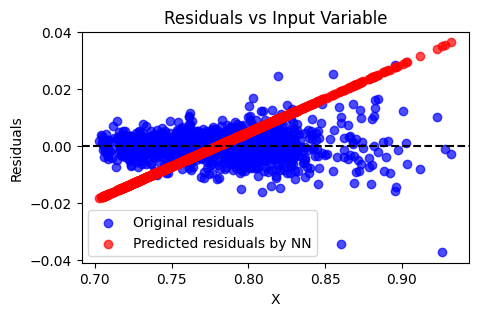

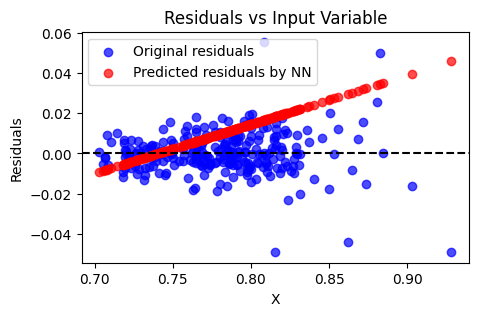

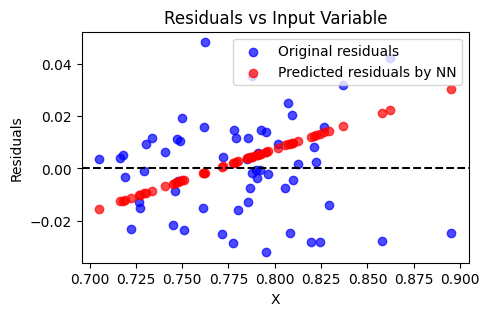

{}

In [ ]:
X = currency1d['Close'][1:len(currency1d)-1].values.reshape(-1, 1)
Y = currency1d['Close'].shift(1)[1:len(currency1d)-1].values
WNN(X,Y)
X = currency1w['Close'][1:len(currency1w)-1].values.reshape(-1, 1)
Y = currency1w['Close'].shift(1)[1:len(currency1w)-1].values
WNN(X,Y)
X = currency1m['Close'][1:len(currency1m)-1].values.reshape(-1, 1)
Y = currency1m['Close'].shift(1)[1:len(currency1m)-1].values
WNN(X,Y)

We can see that the model doesnt predict the residuals well -> which implies that the relationship is truly linear, as the neural network should not be able to model the residuals effectively

###BTC Test WNN

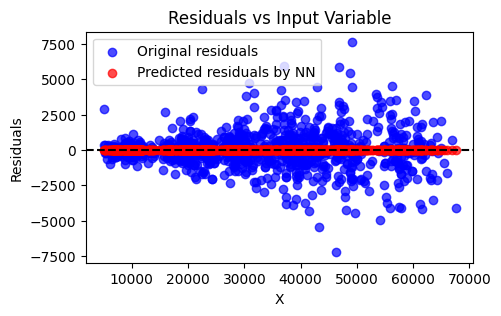

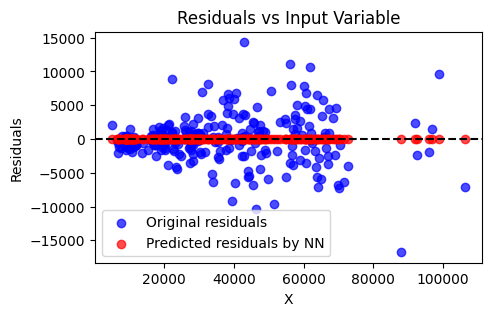

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


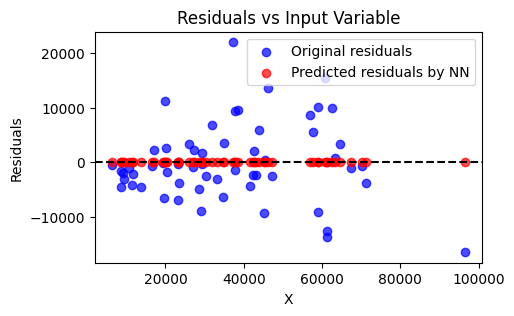

{}

In [ ]:
X = btc1d['Close'][1:len(currency1d)-1].values.reshape(-1, 1)
Y = btc1d['Close'].shift(1)[1:len(currency1d)-1].values
WNN(X,Y)
X = btc1w['Close'][1:len(currency1w)-1].values.reshape(-1, 1)
Y = btc1w['Close'].shift(1)[1:len(currency1w)-1].values
WNN(X,Y)
X = btc1m['Close'][1:len(currency1m)-1].values.reshape(-1, 1)
Y = btc1m['Close'].shift(1)[1:len(currency1m)-1].values
WNN(X,Y)

This model was able to model the pattern slightly better as it made a line that does similariy show where the residuals are centered around so this -> that the relationship modeled is nonlinear as the model is able to pick up on the pattern.

###TSLA Test WNN

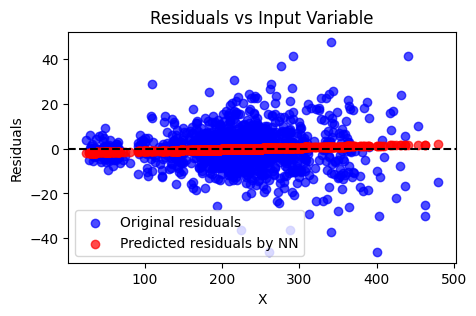

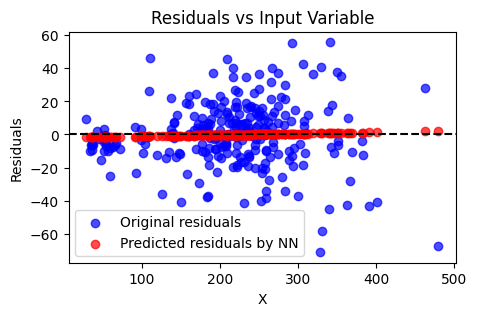

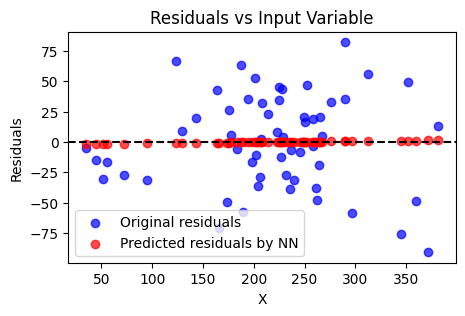

{}

In [ ]:
X = tsla1d['Close'][1:len(currency1d)-1].values.reshape(-1, 1)
Y = tsla1d['Close'].shift(1)[1:len(currency1d)-1].values
WNN(X,Y)
X = tsla1w['Close'][1:len(currency1w)-1].values.reshape(-1, 1)
Y = tsla1w['Close'].shift(1)[1:len(currency1w)-1].values
WNN(X,Y)
X = tsla1m['Close'][1:len(currency1m)-1].values.reshape(-1, 1)
Y = tsla1m['Close'].shift(1)[1:len(currency1m)-1].values
WNN(X,Y)

###BDS Test

In [ ]:
X = currency1d['Close'][1:len(currency1d)-1].values.reshape(-1, 1)
Y = currency1d['Close'].shift(1)[1:len(currency1d)-1].values
BDSTest(X,Y)
X = currency1w['Close'][1:len(currency1w)-1].values.reshape(-1, 1)
Y = currency1w['Close'].shift(1)[1:len(currency1w)-1].values
BDSTest(X,Y)
X = currency1m['Close'][1:len(currency1m)-1].values.reshape(-1, 1)
Y = currency1m['Close'].shift(1)[1:len(currency1m)-1].values
BDSTest(X,Y)

BDS Test Results:
(array(8.18987117), array(2.61505953e-16))
BDS Test Results:
(array(5.25411764), array(1.48735795e-07))
BDS Test Results:
(array(0.81244873), array(0.41653419))


The first two BDS test results, with test statistics of 8.19 and 5.25 and extremely small p-values (2.61e-16 and 1.49e-07), suggest significant nonlinear dependencies in the data, leading to the rejection of the null hypothesis of no nonlinearity. This indicates that the relationships in these datasets are nonlinear. However, the third result, with a test statistic of 0.81 and a p-value of 0.4165, fails to reject the null hypothesis, implying that the relationship is likely linear and does not exhibit significant nonlinear patterns -> the more data that was prevelent showcases the relationship long term.

In [ ]:
X = btc1d['Close'][1:len(currency1d)-1].values.reshape(-1, 1)
Y = btc1d['Close'].shift(1)[1:len(currency1d)-1].values
BDSTest(X,Y)
X = btc1w['Close'][1:len(currency1w)-1].values.reshape(-1, 1)
Y = btc1w['Close'].shift(1)[1:len(currency1w)-1].values
BDSTest(X,Y)
X = btc1m['Close'][1:len(currency1m)-1].values.reshape(-1, 1)
Y = btc1m['Close'].shift(1)[1:len(currency1m)-1].values
BDSTest(X,Y)

BDS Test Results:
(array(6.16748511), array(6.9384644e-10))
BDS Test Results:
(array(3.00895953), array(0.00262144))
BDS Test Results:
(array(1.33279351), array(0.18259958))


The first two BDS test results (with p-values of 6.94e-10 and 0.0026) indicate significant nonlinear dependencies in the data, suggesting that the relationships are nonlinear. In contrast, the third result, with a p-value of 0.1826, fails to reject the null hypothesis, implying that the data is likely linear. Therefore, the first two datasets exhibit nonlinear behavior, while the third follows a linear relationship.

In [ ]:
X = tsla1d['Close'][1:len(currency1d)-1].values.reshape(-1, 1)
Y = tsla1d['Close'].shift(1)[1:len(currency1d)-1].values
BDSTest(X,Y)
X = tsla1w['Close'][1:len(currency1w)-1].values.reshape(-1, 1)
Y = tsla1w['Close'].shift(1)[1:len(currency1w)-1].values
BDSTest(X,Y)
X = tsla1m['Close'][1:len(currency1m)-1].values.reshape(-1, 1)
Y = tsla1m['Close'].shift(1)[1:len(currency1m)-1].values
BDSTest(X,Y)

BDS Test Results:
(array(4.69280059), array(2.69490147e-06))
BDS Test Results:
(array(2.93129382), array(0.00337553))
BDS Test Results:
(array(1.09530319), array(0.27338383))


The first two BDS test results (with p-values of 2.69e-06 and 0.0034) indicate significant nonlinear dependencies in the data, suggesting that the relationships are nonlinear. In contrast, the third result, with a p-value of 0.2734, fails to reject the null hypothesis, implying that the data is likely linear. Therefore, the first two datasets exhibit nonlinear behavior, while the third follows a linear relationship.

References:


1.   [Correlation Integral](https://en.wikipedia.org/wiki/Correlation_integral)
2.   [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
3. [Using BDS statistics to detect nonlinearity in time series -
Patrick Kuok Kun Chu](https://2001.isiproceedings.org/pdf/98.PDF)
4. [BDS Documentaion](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.bds.html)
5. https://en.wikipedia.org/wiki/Nonlinearity_(disambiguation)#:~:text=Nonlinearity%20is%20a%20property%20of,told%20out%2Dof%2Dsequence. [Nonlinearity](https://en.wikipedia.org/wiki/Nonlinearity_(disambiguation)#:~:text=Nonlinearity%20is%20a%20property%20of,told%20out%2Dof%2Dsequence.)
6. [Testing for neglected nonlinearity in time series models: A comparison of neural network methods and alternative tests
Author links open overlay panel - Tae-Hwy Lee,Halbert White, Clive W.J. Granger](https://www.sciencedirect.com/science/article/pii/030440769390122L)


